In [14]:
# 1. Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [7]:
# 2. Load Dataset
df = pd.read_csv("C:/Users/Xperts/Desktop/datset/train.csv") # Adjust path if needed
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
print(df.columns.tolist())


['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSol

In [15]:
# 3. Basic Preprocessing

# Drop rows with missing target
df = df.dropna(subset=['SalePrice'])

# Fill numeric columns with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical columns with mode (column-wise safely)
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    if df[col].isnull().any():
        mode = df[col].mode()
        if not mode.empty:
            df[col] = df[col].fillna(mode[0])
        else:
            df[col] = df[col].fillna("Unknown")

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)


In [16]:
# 4. Define Features & Target
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:

# 5. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:

# 6. Linear Regression (Normal Equation)
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred = lin_reg.predict(X_test_scaled)
print("Linear Regression:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Linear Regression:
RMSE: 75694361898.02322
R² Score: -746987320796.4153


In [20]:
# 7. Polynomial Regression (degree=2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y_train)

y_poly_pred = lin_reg_poly.predict(X_test_poly)
print("\nPolynomial Regression (Degree=2):")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_poly_pred)))
print("R² Score:", r2_score(y_test, y_poly_pred))


Polynomial Regression (Degree=2):
RMSE: 35695.24372924599
R² Score: 0.833885757857809


In [21]:
# 8. Ridge Regression (Grid Search)
ridge = Ridge()
params_ridge = {'alpha': [0.1, 1, 10, 50, 100]}
grid_ridge = GridSearchCV(ridge, params_ridge, cv=5)
grid_ridge.fit(X_train_scaled, y_train)
y_ridge = grid_ridge.predict(X_test_scaled)
print("\nRidge Regression:")
print("Best Alpha:", grid_ridge.best_params_)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_ridge)))
print("R² Score:", r2_score(y_test, y_ridge))


Ridge Regression:
Best Alpha: {'alpha': 100}
RMSE: 31098.783480460006
R² Score: 0.8739122290446626


In [22]:
# 9. Lasso Regression (Grid Search)
lasso = Lasso()
params_lasso = {'alpha': [0.1, 1, 10, 50, 100]}
grid_lasso = GridSearchCV(lasso, params_lasso, cv=5)
grid_lasso.fit(X_train_scaled, y_train)
y_lasso = grid_lasso.predict(X_test_scaled)
print("\nLasso Regression:")
print("Best Alpha:", grid_lasso.best_params_)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_lasso)))
print("R² Score:", r2_score(y_test, y_lasso))


Lasso Regression:
Best Alpha: {'alpha': 100}
RMSE: 44661.82627027111
R² Score: 0.7399486446969026


In [23]:
# 10. SGD Regressor
sgd = SGDRegressor(max_iter=1000, eta0=0.01, learning_rate='invscaling')
sgd.fit(X_train_scaled, y_train)
y_sgd = sgd.predict(X_test_scaled)
print("\nSGD Regressor:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_sgd)))
print("R² Score:", r2_score(y_test, y_sgd))


SGD Regressor:
RMSE: 946345.4319723865
R² Score: -115.7577039651652


In [25]:
# 11. Learning Curves Function
def plot_learning_curve(estimator, title):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X_train_scaled, y_train, cv=5, scoring='r2',
        train_sizes=np.linspace(0.1, 1.0, 5), random_state=42)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_scores_mean, 'o-', label="Training Score")
    plt.plot(train_sizes, val_scores_mean, 'o-', label="Cross-Validation Score")
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

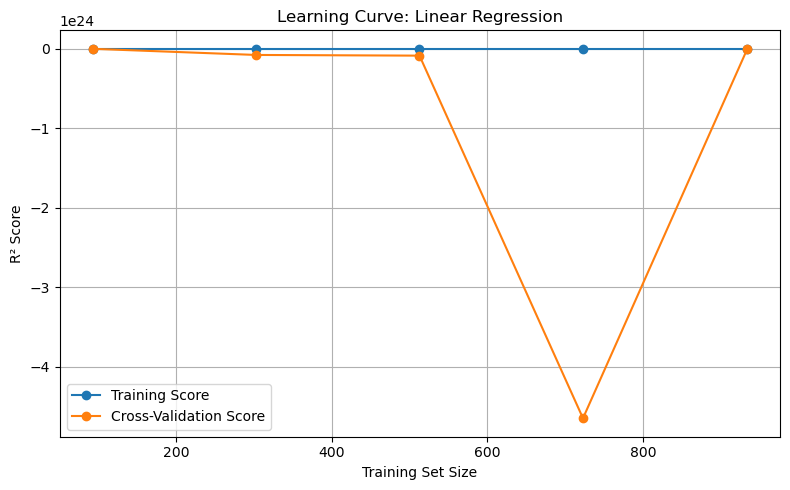

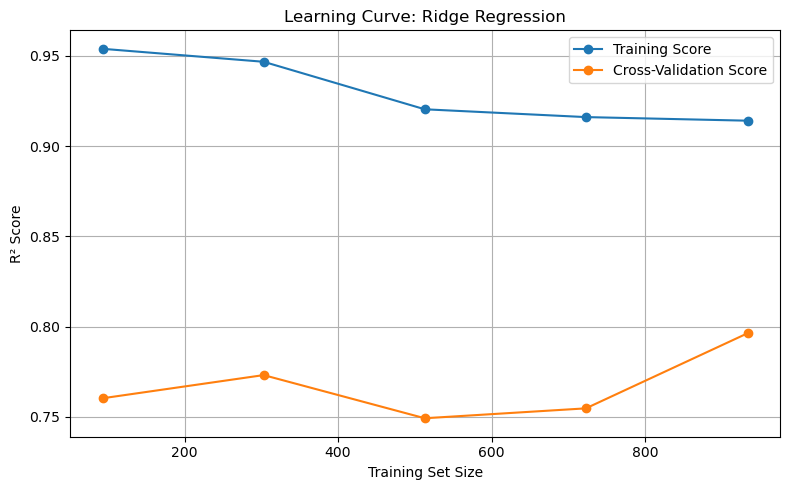

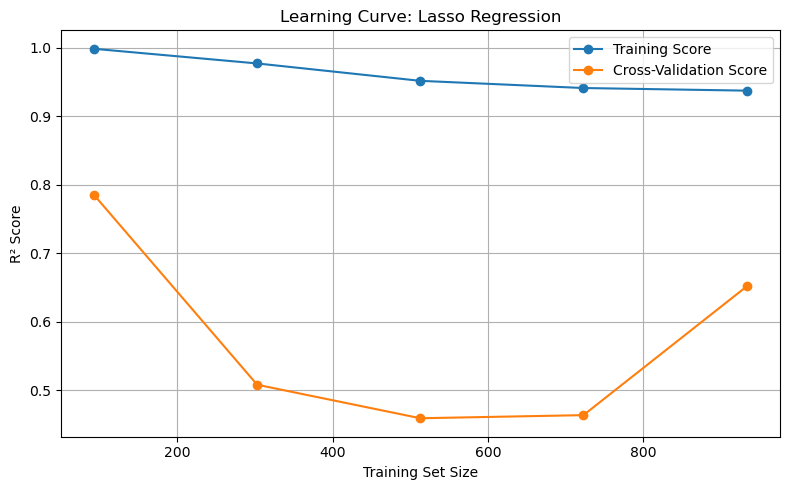

In [26]:
# 12. Plot Learning Curves
plot_learning_curve(lin_reg, "Learning Curve: Linear Regression")
plot_learning_curve(grid_ridge.best_estimator_, "Learning Curve: Ridge Regression")
plot_learning_curve(grid_lasso.best_estimator_, "Learning Curve: Lasso Regression")